# **Multi-Input Model Full Code**

### 압축파일 해제 코드(optional)

In [ ]:
# unzip pitch file

import zipfile

zip_path_pitch_counsel_5244 = './pitch_counsel_5244.zip'
dir_path_pitch_counsel_5244 = './pitch_councel(5244)'

with zipfile.ZipFile(zip_path_pitch_counsel_5244, 'r') as zip_ref:
    zip_ref.extractall(dir_path_pitch_counsel_5244)
        
zip_path_pitch_vp_4756 = './pitch_vp_4756.zip'
dir_path_pitch_vp_4756 = './pitch_vp(4756)'

with zipfile.ZipFile(zip_path_pitch_vp_4756, 'r') as zip_ref:
    zip_ref.extractall(dir_path_pitch_vp_4756)

In [ ]:
# unzip decibel file

import zipfile

zip_path_dB_counsel_5244 = './dB_counsel_5244.zip'
dir_path_dB_counsel_5244 = './dB_councel(5244)'

with zipfile.ZipFile(zip_path_dB_counsel_5244, 'r') as zip_ref:
    zip_ref.extractall(dir_path_dB_counsel_5244)
        
zip_path_dB_vp_4756 = './dB_vp_4756.zip'
dir_path_dB_vp_4756 = './dB_vp(4756)'

with zipfile.ZipFile(zip_path_dB_vp_4756, 'r') as zip_ref:
    zip_ref.extractall(dir_path_dB_vp_4756)

## 필요한 import 문들 및 Module

In [1]:
import os
import numpy as np
import glob
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv1D, Dense, MaxPooling1D,
                                     BatchNormalization,
                                     GlobalAveragePooling1D,
                                     GlobalMaxPool1D,  Flatten, Dropout,
                                     Activation, Input)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import tensorflow as tf
from keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns

2023-08-17 01:19:18.859657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## load decibel data

In [2]:
dir_path_dB_counsel_6352 = './dB_counel(5244)'
dir_path_dB_vp_4756 = './dB_vp(4756)'

In [3]:
# Load data
vp_dB_data = [np.load(os.path.join(dir_path_dB_vp_4756, f)).reshape(-1,1) for f in os.listdir(dir_path_dB_vp_4756) if f.endswith('.npy')]
counsel_dB_data = [np.load(os.path.join(dir_path_dB_counsel_6352, f)).reshape(-1,1) for f in os.listdir(dir_path_dB_counsel_6352) if f.endswith('.npy')]

In [4]:
len(counsel_dB_data), len(vp_dB_data)

(5244, 4756)

In [5]:
counsel_dB_data[0].shape, vp_dB_data[0].shape

((157, 1), (157, 1))

## load pitch data

In [6]:
dir_path_pitch_counsel_5244 = './pitch_councel(5244)'
dir_path_pitch_vp_4756 = './pitch_vp(4756)'

In [7]:
# Load data
vp_pit_data = [np.load(os.path.join(dir_path_pitch_vp_4756, f)).reshape(-1,1) for f in os.listdir(dir_path_pitch_vp_4756) if f.endswith('.npy')]
counsel_pit_data = [np.load(os.path.join(dir_path_pitch_counsel_5244, f)).reshape(-1,1) for f in os.listdir(dir_path_pitch_counsel_5244) if f.endswith('.npy')]

In [8]:
len(counsel_pit_data), len(vp_pit_data)

(5244, 4756)

In [9]:
counsel_pit_data[0].shape, vp_pit_data[0].shape

((157, 1), (157, 1))

## data labeling(decibel data)

In [10]:
# Data labeling
vp_dB_labels = [0] * len(vp_dB_data) # Label voice phishing data as 0
counsel_dB_labels = [1] * len(counsel_dB_data) # Counseling data is labeled as 1

## data labeling(pitch data)

In [11]:
# Data labeling
vp_pit_labels = [0] * len(vp_pit_data) # Label voice phishing data as 0
counsel_pit_labels = [1] * len(counsel_pit_data) # Counseling data is labeled as 1

## combine decibel data

In [12]:
# Combine data and labels into one list
x_data_dB = vp_dB_data  + counsel_dB_data
y_labels_dB = vp_dB_labels + counsel_dB_labels

## combine pitch data

In [13]:
# Combine data and labels into one list
x_data_pit = vp_pit_data  + counsel_pit_data
y_labels_pit = vp_pit_labels + counsel_pit_labels

## Convert list to numpy arrays

In [14]:
# Convert lists to numpy arrays
x_data_dB = np.array(x_data_dB)
y_labels_dB = np.array(y_labels_dB)

# Convert lists to numpy arrays
x_data_pit = np.array(x_data_pit)
y_labels_pit = np.array(y_labels_pit)

# Ensure the labels are the same for both types of data
assert np.all(y_labels_dB == y_labels_pit), "Mismatch in labels!"

In [15]:
len(y_labels_dB)

10000

In [16]:
len(y_labels_pit)

10000

## data splitting

In [25]:
from sklearn.model_selection import train_test_split

# First, split the dataset into a temporary training set and test set.
decibel_temp, decibel_test, pitch_temp, pitch_test, y_temp, y_test = train_test_split(x_data_dB, x_data_pit, y_labels_dB, test_size=1000, random_state=42, shuffle=True)

# Split the temporary training set into a final training set and a validation set.
decibel_train, decibel_val, pitch_train, pitch_val, y_train, y_val = train_test_split(decibel_temp, pitch_temp, y_temp, test_size=1500, random_state=42, shuffle=True)


In [26]:
# Print the shapes of the data arrays
print(f"Decibel Train data shape: {decibel_train.shape}")
print(f"Decibel Validation data shape: {decibel_val.shape}")
print(f"Decibel Test data shape: {decibel_test.shape}")
print()
print(f"Pitch Train data shape: {pitch_train.shape}")
print(f"Pitch Validation data shape: {pitch_val.shape}")
print(f"Pitch Test data shape: {pitch_test.shape}")
print()
print(f"Train Labels shape: {y_train.shape}")
print(f"Validation Labels shape: {y_val.shape}")
print(f"Test Labels shape: {y_test.shape}")


Decibel Train data shape: (7500, 157, 1)
Decibel Validation data shape: (1500, 157, 1)
Decibel Test data shape: (1000, 157, 1)

Pitch Train data shape: (7500, 157, 1)
Pitch Validation data shape: (1500, 157, 1)
Pitch Test data shape: (1000, 157, 1)

Train Labels shape: (7500,)
Validation Labels shape: (1500,)
Test Labels shape: (1000,)


## 모델 layer 초기화

In [27]:
K.clear_session()

## Multi input model definition

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, GlobalAveragePooling1D, Dense, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental.preprocessing import Normalization

# Create a normalization layer.
norm_layerA = Normalization(name="decibel_model_NormalizationLayer", axis=1)
norm_layerB = Normalization(name="pitch_model_NormalizationLayer", axis=1)

# 레이어를 훈련 데이터에 적응시킵니다.
norm_layerA.adapt(decibel_train)
norm_layerB.adapt(pitch_train)

# Define the shape of the input data. Here we assume (157, 1).
input_shape = (157, 1)

# Create two input layers.
inputA = Input(shape=input_shape, name="input_decibel")
inputB = Input(shape=input_shape, name="input_pitch")

# Apply a normalization layer to the input data.
x = norm_layerA(inputA)
y = norm_layerB(inputB)

# 첫번째 입력에 대한 Convolutional 레이어를 정의합니다.
x = Conv1D(32, 3, dilation_rate=1, padding='causal', activation='relu')(x)
x = Conv1D(64, 3, dilation_rate=2, padding='causal', activation='relu')(x)
x = Conv1D(128, 3, dilation_rate=4, padding='causal', activation='relu')(x)
x = Conv1D(128, 3, dilation_rate=8, padding='causal', activation='relu')(x)
x = Conv1D(256, 3, dilation_rate=16, padding='causal', activation='relu')(x)
x = Conv1D(512, 3, dilation_rate=32, padding='causal', activation='relu')(x)
x = GlobalAveragePooling1D()(x)

# 첫번째 입력에 대한 Convolutional 레이어를 정의합니다.
y = Conv1D(32, 3, dilation_rate=1, padding='causal', activation='relu')(y)
y = Conv1D(64, 3, dilation_rate=2, padding='causal', activation='relu')(y)
y = Conv1D(128, 3, dilation_rate=4, padding='causal', activation='relu')(y)
y = Conv1D(128, 3, dilation_rate=8, padding='causal', activation='relu')(y)
y = Conv1D(256, 3, dilation_rate=16, padding='causal', activation='relu')(y)
y = Conv1D(512, 3, dilation_rate=32, padding='causal', activation='relu')(y)
y = GlobalAveragePooling1D()(y)


# Combine the results of the two inputs.
z = concatenate([x, y])

# Use the combined data to generate the final output.
z = Dense(64, activation="relu", name="dense_1")(z)
# z = Dropout(0.2)(z)
z = Dense(32, activation="relu", name="dense_2")(z)
# z = Dropout(0.2)(z)
z = Dense(1, activation="sigmoid", name="output_layer")(z)

# Generate the final model.
model = Model(inputs=[inputA, inputB], outputs=z)

# Model summary
model.summary()

2023-08-17 01:21:35.523244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 01:21:37.102949: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6635 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:17:00.0, compute capability: 7.5
2023-08-17 01:21:37.103709: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6534 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:b3:00.0, compute capability: 7.5


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_decibel (InputLayer)     [(None, 157, 1)]     0           []                               
                                                                                                  
 input_pitch (InputLayer)       [(None, 157, 1)]     0           []                               
                                                                                                  
 decibel_model_NormalizationLay  (None, 157, 1)      315         ['input_decibel[0][0]']          
 er (Normalization)                                                                               
                                                                                                  
 pitch_model_NormalizationLayer  (None, 157, 1)      315         ['input_pitch[0][0]']        

## Plotting model

In [29]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, show_shapes=True, show_layer_activations=True)

## Training Model with train data & Final Evaluatation with test data

In [30]:
# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='auto')

# ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    'multi_input_model.h5',  # Path where to save the model
    monitor='val_accuracy',  # The metric to monitor
    verbose=1,  # Log info
    save_best_only=True,  # Only save the best model
    mode='max',  # Maximize val_accuracy
    overwrite=True
)

callbacks = [early_stopping, model_checkpoint]

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit([decibel_train, pitch_train], y_train,
                    validation_data=([decibel_val, pitch_val], y_val),
                    epochs=100, batch_size=64,
                    callbacks=callbacks) # Add the callbacks to the model fit method


Epoch 1/100


2023-08-17 01:22:01.457243: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-08-17 01:22:03.315806: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x4e667bc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-17 01:22:03.315883: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2023-08-17 01:22:03.315907: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2023-08-17 01:22:03.326686: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-17 01:22:03.505941: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


118/118 [==============================] - ETA: 0s - loss: 0.5272 - accuracy: 0.7416
Epoch 1: val_accuracy improved from -inf to 0.77867, saving model to multi_input_model.h5
118/118 [==============================] - 18s 71ms/step - loss: 0.5272 - accuracy: 0.7416 - val_loss: 0.4951 - val_accuracy: 0.7787
Epoch 2/100
118/118 [==============================] - ETA: 0s - loss: 0.3910 - accuracy: 0.8251
Epoch 2: val_accuracy improved from 0.77867 to 0.85000, saving model to multi_input_model.h5
118/118 [==============================] - 4s 36ms/step - loss: 0.3910 - accuracy: 0.8251 - val_loss: 0.3438 - val_accuracy: 0.8500
Epoch 3/100
118/118 [==============================] - ETA: 0s - loss: 0.3437 - accuracy: 0.8524
Epoch 3: val_accuracy did not improve from 0.85000
118/118 [==============================] - 4s 34ms/step - loss: 0.3437 - accuracy: 0.8524 - val_loss: 0.3569 - val_accuracy: 0.8413
Epoch 4/100
117/118 [============================>.] - ETA: 0s - loss: 0.3177 - accuracy: 

## Plot Accuracy & Loss of train, validation data

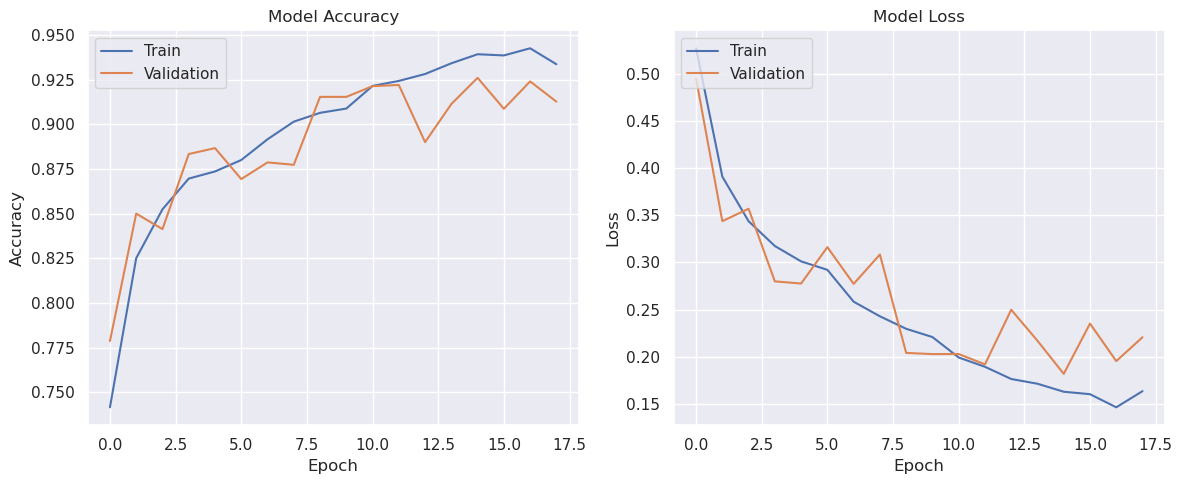

In [31]:
# seaborn 스타일 설정
sns.set()

# 그림 생성
plt.figure(figsize=(12,5))

# 훈련 및 검증 정확도 그리기
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# 훈련 및 검증 손실 값 그리기
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Best val accuracy model로 final evaluate

In [32]:
from tensorflow.keras.models import load_model

# Load the saved model
model_best = load_model('multi_input_model.h5')

# Evaluate the model using test data
test_loss, test_accuracy = model_best.evaluate([decibel_test, pitch_test], y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


32/32 [==============================] - 1s 14ms/step - loss: 0.2052 - accuracy: 0.9170
Test Loss: 0.20517101883888245
Test Accuracy: 0.9169999957084656


## draw confusion matrix

32/32 [==============================] - 1s 8ms/step


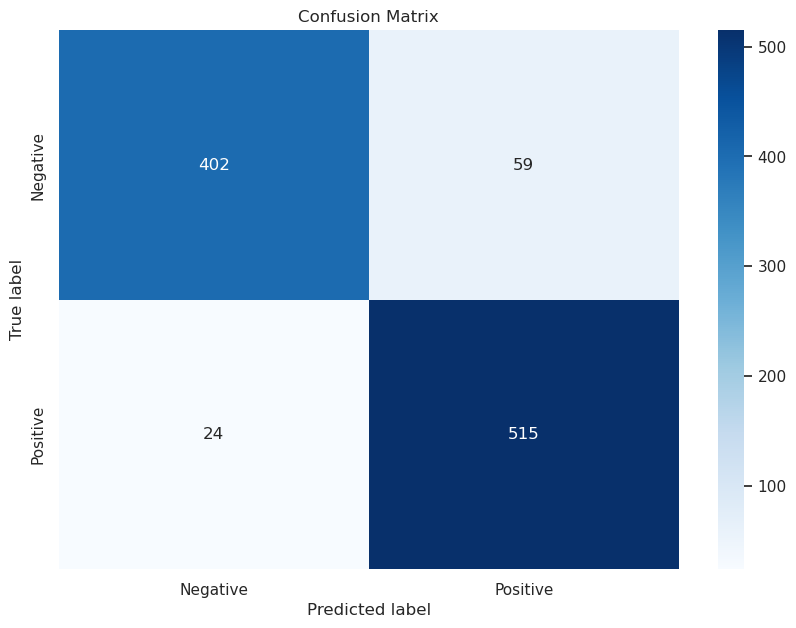

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming model is your trained model and X_test and y_test are your test data and labels:
y_pred = model_best.predict([decibel_test, pitch_test])
y_pred = np.round(y_pred).flatten()  # flatten and round predictions to match label format

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
# negative = 0 ; 보이스피싱범, positive = 1 ; 상담원
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')  # 'd' stands for integer formatting
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
